In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os


In [2]:
#Import csv file into data frame
delays_df = pd.read_csv("Data/Airline_Delay_Cause.csv")
delays_df



,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
71658,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
71659,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0
71660,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0


In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
delays_df.count()


year                   71662
month                  71662
carrier                71662
carrier_name           71662
airport                71662
airport_name           71662
arr_flights            71531
arr_del15              71346
carrier_ct             71531
weather_ct             71531
nas_ct                 71531
security_ct            71531
late_aircraft_ct       71531
arr_cancelled          71531
arr_diverted           71531
arr_delay              71531
carrier_delay          71531
weather_delay          71531
nas_delay              71531
security_delay         71531
late_aircraft_delay    71531
dtype: int64

In [5]:
#clean up data
delays_df = delays_df.dropna(how='any')
delays_df.count()

year                   71346
month                  71346
carrier                71346
carrier_name           71346
airport                71346
airport_name           71346
arr_flights            71346
arr_del15              71346
carrier_ct             71346
weather_ct             71346
nas_ct                 71346
security_ct            71346
late_aircraft_ct       71346
arr_cancelled          71346
arr_diverted           71346
arr_delay              71346
carrier_delay          71346
weather_delay          71346
nas_delay              71346
security_delay         71346
late_aircraft_delay    71346
dtype: int64

In [6]:
#calculate the total minutes of delays by type of delay
gr_delays_df = delays_df.groupby(["year"])
type_of_delays = ["carrier_delay","weather_delay","nas_delay", "security_delay", "late_aircraft_delay","carrier_ct",
                 "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]
total_minutes = gr_delays_df[type_of_delays].sum()
total_minutes

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
year,,,,,,,,,,
2019,29352960.0,5282501.0,23044854.0,133484.0,38075922.0,387853.40,46302.53,439490.62,2642.27,512965.20
2020,11260214.0,1894289.0,5831467.0,63083.0,7860388.0,156852.77,19647.38,144325.07,1543.31,109553.33
2021,27197273.0,4580003.0,11130095.0,226000.0,23479920.0,394017.93,44230.01,247044.20,4701.70,320339.14
2022,22397637.0,2969174.0,9382590.0,115260.0,20766341.0,313797.29,29379.05,194779.23,2566.91,282139.02


In [7]:

#calculate the minutes of delay/total delays

total_minutes["Carrier Delay (Min/#delay)"]=total_minutes.loc[:,"carrier_delay"]/total_minutes.loc[:,"carrier_ct"]
total_minutes["Weather Delay (Min/#delay)"]=total_minutes.loc[:,"weather_delay"]/total_minutes.loc[:,"weather_ct"]
total_minutes["NAS Delay (Min/#delay)"]=total_minutes.loc[:,"nas_delay"]/total_minutes.loc[:,"nas_ct"]
total_minutes["Security Delay (Min/#delay)"]=total_minutes.loc[:,"security_delay"]/total_minutes.loc[:,"security_ct"]
total_minutes["Late Aircraft Delay (Min/#delay)"]=total_minutes.loc[:,"late_aircraft_delay"]/total_minutes.loc[:,"late_aircraft_ct"]

total_minutes

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,Carrier Delay (Min/#delay),Weather Delay (Min/#delay),NAS Delay (Min/#delay),Security Delay (Min/#delay),Late Aircraft Delay (Min/#delay)
year,,,,,,,,,,,,,,,
2019,29352960.0,5282501.0,23044854.0,133484.0,38075922.0,387853.40,46302.53,439490.62,2642.27,512965.20,75.680554,114.086660,52.435372,50.518683,74.227105
2020,11260214.0,1894289.0,5831467.0,63083.0,7860388.0,156852.77,19647.38,144325.07,1543.31,109553.33,71.788429,96.414331,40.405087,40.875132,71.749421
2021,27197273.0,4580003.0,11130095.0,226000.0,23479920.0,394017.93,44230.01,247044.20,4701.70,320339.14,69.025470,103.549671,45.053051,48.067720,73.297069
2022,22397637.0,2969174.0,9382590.0,115260.0,20766341.0,313797.29,29379.05,194779.23,2566.91,282139.02,71.376133,101.064330,48.170382,44.902237,73.603222


In [8]:
min_delays = ["Carrier Delay (Min/#delay)", "Weather Delay (Min/#delay)", "NAS Delay (Min/#delay)", 
              "Security Delay (Min/#delay)", "Late Aircraft Delay (Min/#delay)"
        ]

total_minutes_delay = total_minutes[min_delays]
total_minutes_delay

,Carrier Delay (Min/#delay),Weather Delay (Min/#delay),NAS Delay (Min/#delay),Security Delay (Min/#delay),Late Aircraft Delay (Min/#delay)
year,,,,,
2019,75.680554,114.086660,52.435372,50.518683,74.227105
2020,71.788429,96.414331,40.405087,40.875132,71.749421
2021,69.025470,103.549671,45.053051,48.067720,73.297069
2022,71.376133,101.064330,48.170382,44.902237,73.603222


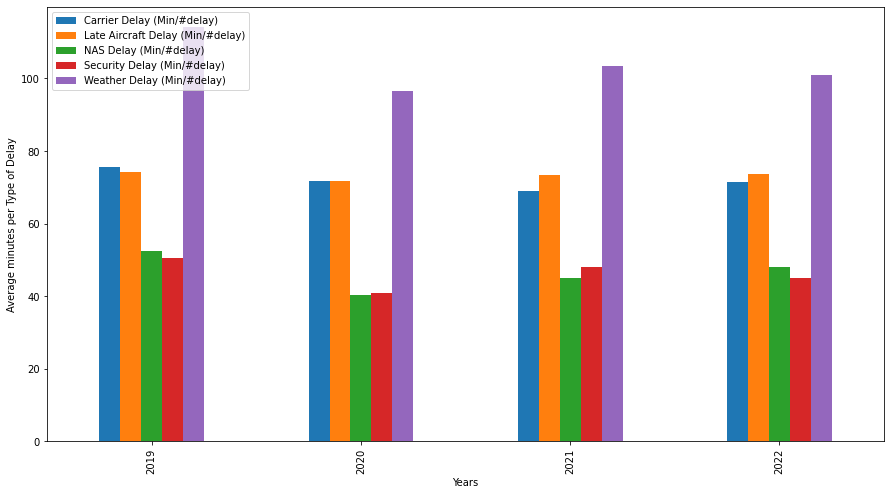

In [9]:
# Generate a bar plot showing the average minutes per type of delay from 2019 to 2022
total_minutes_delay_pivot = pd.pivot_table(total_minutes_delay,
                                           index="year")
ax = total_minutes_delay_pivot.plot(kind = "bar", legend=False)
fig = ax.get_figure()
fig.set_size_inches(15, 8)
ax.legend(loc="upper left")
ax.set_xlabel("Years")
ax.set_ylabel("Average minutes per Type of Delay")
# Save the figure
plt.savefig("AverageMinutesDelay.png")

In [10]:
gr_delays_carrier_df = delays_df.groupby(["carrier_name"])
type_of_delays_2 = ["weather_delay", "weather_ct"]
total_minutes_2 = gr_delays_carrier_df[type_of_delays_2].sum()


total_minutes_2["Weather Delay (Min/#delay)"]=total_minutes_2.loc[:,"weather_delay"]/total_minutes_2.loc[:,"weather_ct"]
total_minutes_2_topAirlines = total_minutes_2.loc[total_minutes_2["weather_ct"]>=10000]
total_minutes_2_topAirlines

,weather_delay,weather_ct,Weather Delay (Min/#delay)
carrier_name,,,
American Airlines Inc.,1768840.0,18152.87,97.441341
Delta Air Lines Inc.,1456094.0,12964.86,112.310816
Envoy Air,1023887.0,10146.36,100.911756
SkyWest Airlines Inc.,3827356.0,33442.33,114.446452
Southwest Airlines Co.,838389.0,10373.48,80.820419
United Air Lines Inc.,1298506.0,11405.17,113.852402


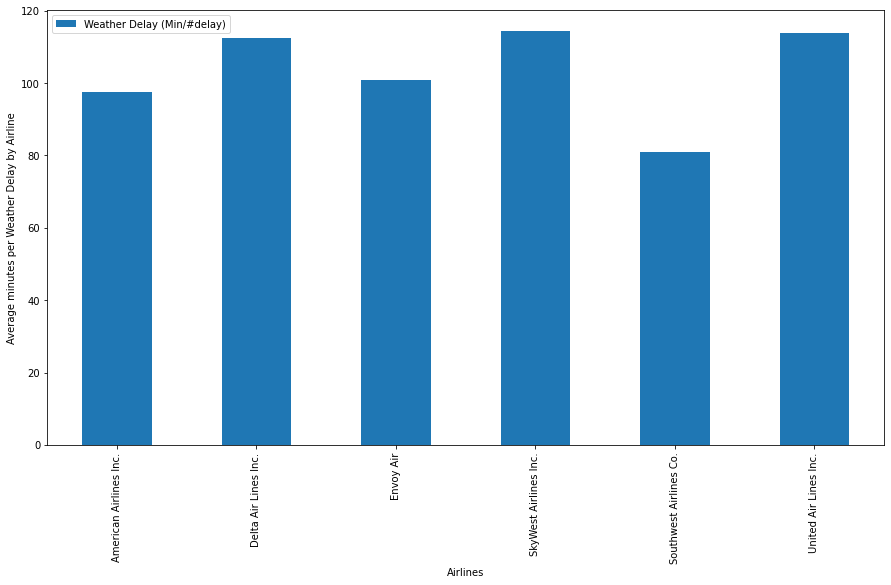

In [19]:
total_minutes_2_topAirlines["Weather Delay (Min/#delay)"]

ax2 = total_minutes_2_topAirlines["Weather Delay (Min/#delay)"].plot(kind = "bar", legend=False)
fig2 = ax2.get_figure()
fig2.set_size_inches(15, 8)
ax2.legend(loc="upper left")
ax2.set_xlabel("Airlines")
ax2.set_ylabel("Average minutes per Weather Delay by Airline")
# Save the figure
plt.savefig("AverageMinutesWeatherDelay10k+.png")

In [12]:
gr_delays_carrier_df = delays_df.groupby(["carrier_name"])
type_of_delays_3 = ["carrier_delay", "carrier_ct"]
total_minutes_3 = gr_delays_carrier_df[type_of_delays_3].sum()

total_minutes_3["Carrier Delay (Min/#delay)"]=total_minutes_3.loc[:,"carrier_delay"]/total_minutes_3.loc[:,"carrier_ct"]
total_minutes_3_topAirlines = total_minutes_3.loc[total_minutes_3["carrier_ct"]>=10000]
total_minutes_3_topAirlines

,carrier_delay,carrier_ct,Carrier Delay (Min/#delay)
carrier_name,,,
Alaska Airlines Inc.,1900550.0,32191.60,59.038693
Allegiant Air,2123679.0,24222.86,87.672513
American Airlines Inc.,12940635.0,167485.75,77.264096
Delta Air Lines Inc.,10996982.0,137885.16,79.754645
Endeavor Air Inc.,2655371.0,30730.56,86.408155
Envoy Air,2392266.0,35266.06,67.834796
Frontier Airlines Inc.,2091114.0,30971.19,67.518039
Hawaiian Airlines Inc.,691081.0,16566.04,41.716729
JetBlue Airways,6050016.0,76849.50,78.725509


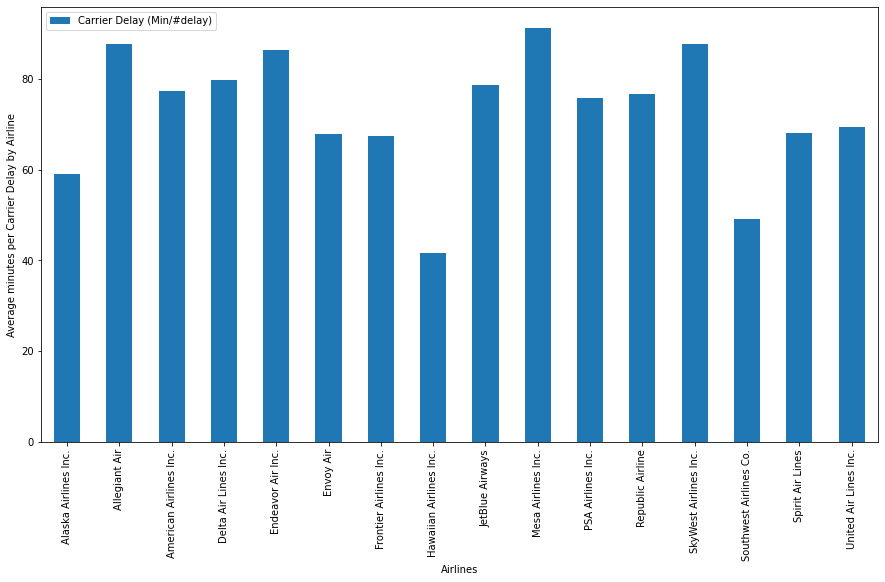

In [20]:
total_minutes_3_topAirlines["Carrier Delay (Min/#delay)"]

ax2 = total_minutes_3_topAirlines["Carrier Delay (Min/#delay)"].plot(kind = "bar", legend=False)
fig2 = ax2.get_figure()
fig2.set_size_inches(15, 8)
ax2.legend(loc="upper left")
ax2.set_xlabel("Airlines")
ax2.set_ylabel("Average minutes per Carrier Delay by Airline")
# Save the figure
plt.savefig("AverageMinutesCarrierDelay10k+.png")

In [14]:
gr_delays_carrier_df = delays_df.groupby(["carrier_name"])
type_of_delays_4 = ["late_aircraft_delay", "late_aircraft_ct"]
total_minutes_4 = gr_delays_carrier_df[type_of_delays_4].sum()

total_minutes_4["Late Aircraft Delay (Min/#delay)"]=total_minutes_4.loc[:,"late_aircraft_delay"]/total_minutes_4.loc[:,"late_aircraft_ct"]
total_minutes_4_topAirlines = total_minutes_4.loc[total_minutes_4["late_aircraft_ct"]>=10000]
total_minutes_4_topAirlines

,late_aircraft_delay,late_aircraft_ct,Late Aircraft Delay (Min/#delay)
carrier_name,,,
Alaska Airlines Inc.,1999002.0,33887.62,58.989153
Allegiant Air,2749945.0,39099.16,70.332585
American Airlines Inc.,13012863.0,160395.02,81.130094
Delta Air Lines Inc.,6526182.0,92942.63,70.217316
Endeavor Air Inc.,2859711.0,35396.52,80.790739
Envoy Air,3693699.0,53437.90,69.121335
Frontier Airlines Inc.,2898682.0,33900.12,85.506541
JetBlue Airways,5518467.0,60198.43,91.671278
Mesa Airlines Inc.,3448511.0,37263.76,92.543291


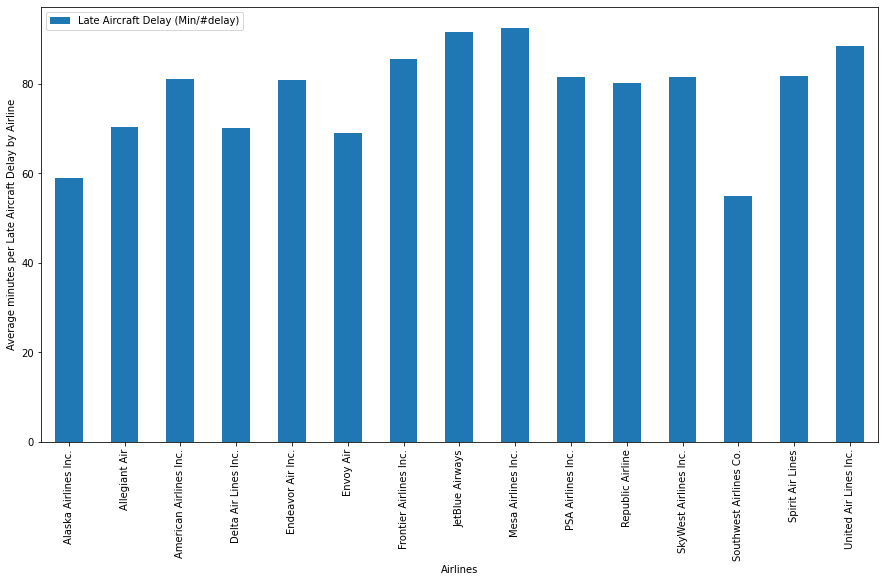

In [21]:
total_minutes_4_topAirlines["Late Aircraft Delay (Min/#delay)"]

ax2 = total_minutes_4_topAirlines["Late Aircraft Delay (Min/#delay)"].plot(kind = "bar", legend=False)
fig2 = ax2.get_figure()
fig2.set_size_inches(15, 8)
ax2.legend(loc="upper left")
ax2.set_xlabel("Airlines")
ax2.set_ylabel("Average minutes per Late Aircraft Delay by Airline")
# Save the figure
plt.savefig("AverageMinutesLateDelay10k+.png")

Text(0, 0.5, 'Average minutes per Delay by Airline')

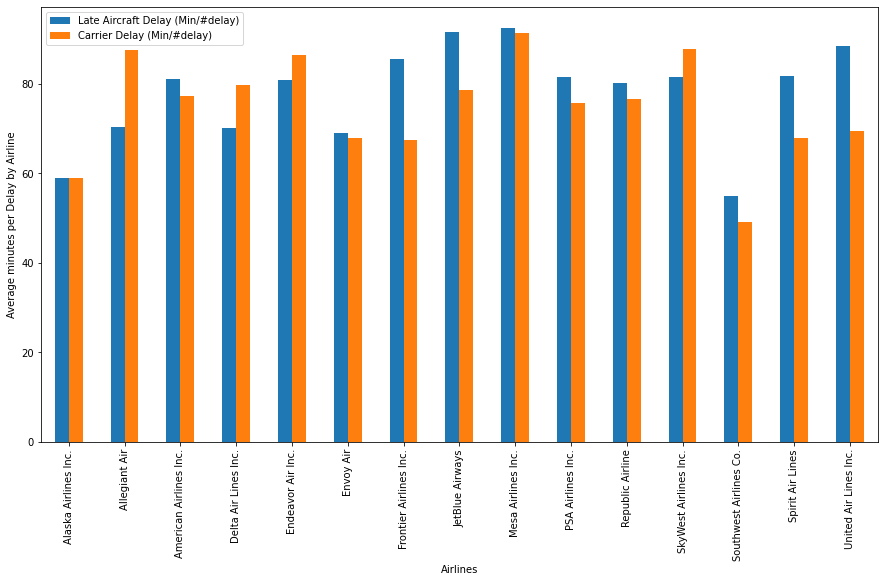

In [36]:
total_minutes_3_topAirlines
total_minutes_4_topAirlines

merge_df = pd.merge(total_minutes_3_topAirlines, total_minutes_4_topAirlines, on="carrier_name")
merge_df2 = merge_df[["Late Aircraft Delay (Min/#delay)","Carrier Delay (Min/#delay)"]]
merge_df2
ax2 = merge_df2.plot(kind = "bar", legend=False)
fig2 = ax2.get_figure()
fig2.set_size_inches(15, 8)
ax2.legend(loc="upper left")
ax2.set_xlabel("Airlines")
ax2.set_ylabel("Average minutes per Delay by Airline")

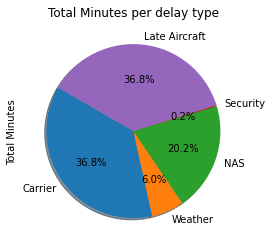

<Figure size 432x288 with 0 Axes>

In [37]:
tot_min_carrier = delays_df["carrier_delay"].sum()
tot_min_weather = delays_df["weather_delay"].sum()
tot_min_nas = delays_df["nas_delay"].sum()
tot_min_security = delays_df["security_delay"].sum()
tot_min_late = delays_df["late_aircraft_delay"].sum()

delay_dict = {
    "Delay Type" :["Carrier","Weather", "NAS","Security","Late Aircraft"],
    "Total Minutes" : [tot_min_carrier,tot_min_weather,tot_min_nas,tot_min_security,tot_min_late]
}

delay_tot_min_df = pd.DataFrame(delay_dict)

delay_tot_min_df = delay_tot_min_df.set_index("Delay Type")




labels = delay_tot_min_df.index.values
delay_tot_min_df["Total Minutes"].plot(kind="pie", y="Delay Type", autopct="%1.1f%%", startangle = 150, shadow=True, labels= labels, legend=False)

#Add title
plt.title("Total Minutes per delay type")

#show graphic
plt.show()
plt.tight_layout()

# Save the figure
plt.savefig("TotalMinutesDelayPie.png")

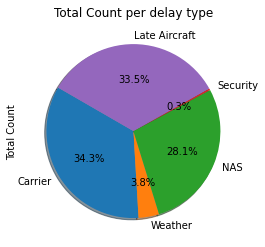

<Figure size 432x288 with 0 Axes>

In [26]:
tot_ct_carrier = delays_df["carrier_ct"].sum()
tot_ct_weather = delays_df["weather_ct"].sum()
tot_ct_nas = delays_df["nas_ct"].sum()
tot_ct_security = delays_df["security_ct"].sum()
tot_ct_late = delays_df["late_aircraft_ct"].sum()

delay_dict_ct = {
    "Delay Type" :["Carrier","Weather", "NAS","Security","Late Aircraft"],
    "Total Count" : [tot_ct_carrier,tot_ct_weather,tot_ct_nas,tot_ct_security,tot_ct_late]
}

delay_tot_ct_df = pd.DataFrame(delay_dict_ct)

delay_tot_ct_df = delay_tot_ct_df.set_index("Delay Type")




labels = delay_tot_ct_df.index.values
delay_tot_ct_df["Total Count"].plot(kind="pie", y="Delay Type", autopct="%1.1f%%", startangle = 150, shadow=True, labels= labels, legend=False)

#Add title
plt.title("Total Count per delay type")

#show graphic
plt.show()
plt.tight_layout()

# Save the figure
plt.savefig("TotalCountDelayPie.png")

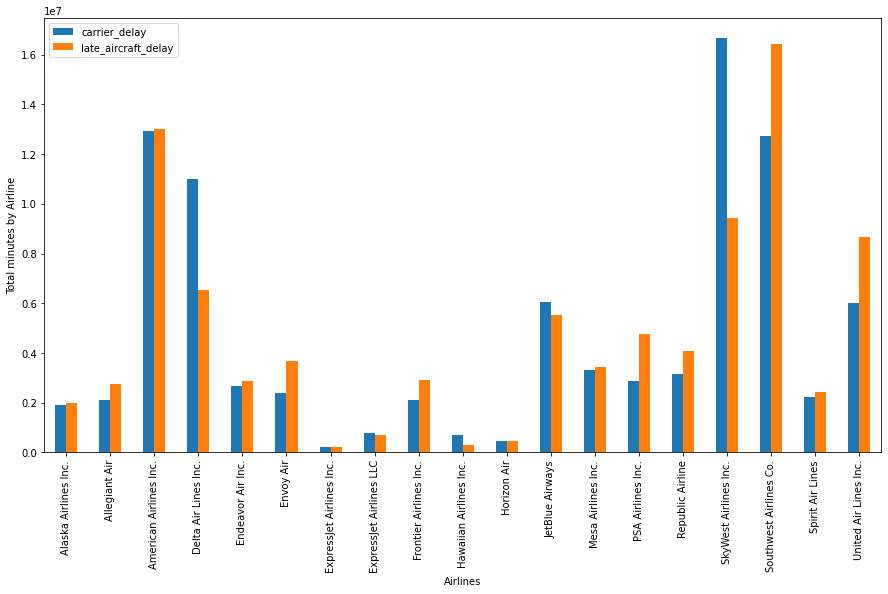

In [24]:
gr_delays_carrier_df = delays_df.groupby(["carrier_name"])
total_carrier_late = gr_delays_carrier_df["carrier_delay","late_aircraft_delay"].sum()

ax2 = total_carrier_late.plot(kind = "bar", legend=False)
fig2 = ax2.get_figure()
fig2.set_size_inches(15, 8)
ax2.legend(loc="upper left")
ax2.set_xlabel("Airlines")
ax2.set_ylabel("Total minutes by Airline")
# Save the figure
plt.savefig("TotalMinutesAirline.png")